In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Extracted file ID from your link
file_id = "10HFSUvBzHJGYenAPXmwli6ZlYl75acQ5"

# Create a direct download link
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Read the CSV
df = pd.read_csv(download_url)


In [ ]:
# Display first 5 rows
df.head()

,Unnamed: 0,username,name,joining_year,repositories,last_year_contributions,achievements_num,stars,followers,followings,...,status,location,language,sorting_type,gender_pronoun,social_link,social_platform,description,sorting type,Unnamed: 21
0,0,SumithSPrince,Sumith S,2021,1.0,2.0,0.0,0.0,0.0,1.0,...,NaN,"Bangalore, India",Java,NaN,he/him,NaN,NaN,Hello 👋\n\nGreat you visited my profile!\n\nI'...,Most recently joined,NaN
1,1,infysumanta,Sumanta Kabiraj,2018,445.0,623.0,5.0,87.0,9.0,38.0,...,Focusing,"Kolkata, India",Java,NaN,NaN,https://sumantakabiraj.com,X@infysumanta,Sculpting the digital frontier with a mastery ...,Most repositories,NaN
2,2,codingwithkrish,Krish Gupta,2021,37.0,204.0,6.0,9.0,6.0,8.0,...,NaN,India,Java,NaN,NaN,http://krishgupta.com,NaN,I am a B.Tech Professional students from Vishw...,Most followers,NaN
3,3,anirbanbose401,ANIRBAN BOSE,2023,3.0,2.0,0.0,0.0,0.0,3.0,...,NaN,India,Java,NaN,he/him,https://www.soa.ac.in/iter,LinkedInin/anirban-bose-4a238b245,I've always been interested in programming. So...,Most recently joined,NaN
4,4,neilrehani101,Neil Rehani,2021,29.0,6.0,0.0,0.0,0.0,3.0,...,NaN,India,Python,NaN,he/him,NaN,NaN,I am a keen learner and want to explore nearly...,Fewest followers,NaN


In [ ]:
df.shape

(10122, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10122 entries, 0 to 10121
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10096 non-null  object 
 1   username                 10083 non-null  object 
 2   name                     10095 non-null  object 
 3   joining_year             10096 non-null  object 
 4   repositories             10070 non-null  float64
 5   last_year_contributions  10070 non-null  float64
 6   achievements_num         10070 non-null  float64
 7   stars                    10070 non-null  float64
 8   followers                10070 non-null  float64
 9   followings               7173 non-null   float64
 10  has_readme               10070 non-null  object 
 11  works_for                3481 non-null   object 
 12  status                   4220 non-null   object 
 13  location                 10070 non-null  object 
 14  language              

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,26
username,39
name,27
joining_year,26
repositories,52
last_year_contributions,52
achievements_num,52
stars,52
followers,52
followings,2949


In [ ]:
# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

In [ ]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 21', 'sorting_type','works_for','status','social_link','social_platform','gender_pronoun','description' ], inplace=True)


In [ ]:
numeric_cols = ['repositories', 'last_year_contributions', 'achievements_num', 'stars', 'followers', 'followings']
df[numeric_cols] = df[numeric_cols].fillna(0).astype(int)


In [ ]:
df['location'] = df['location'].fillna('Unknown').str.strip()
df['language'] = df['language'].fillna('Unknown').str.lower()



In [ ]:
# Handling missing values
df["joining_year"] = df["joining_year"].fillna(df["joining_year"].mode()[0])
df["has_readme"] = df["has_readme"].fillna(df["has_readme"].mode()[0])
df["sorting type"] = df["sorting type"].fillna(df["sorting type"].mode()[0])

In [ ]:
# Handling missing values by removing
df.dropna(subset=['name'], inplace=True)
df.dropna(subset=['username'], inplace=True)

In [ ]:
df.isnull().sum()

,0
username,0
name,0
joining_year,0
repositories,0
last_year_contributions,0
achievements_num,0
stars,0
followers,0
followings,0
has_readme,0


# **Exploratory Data Analysis (EDA)**

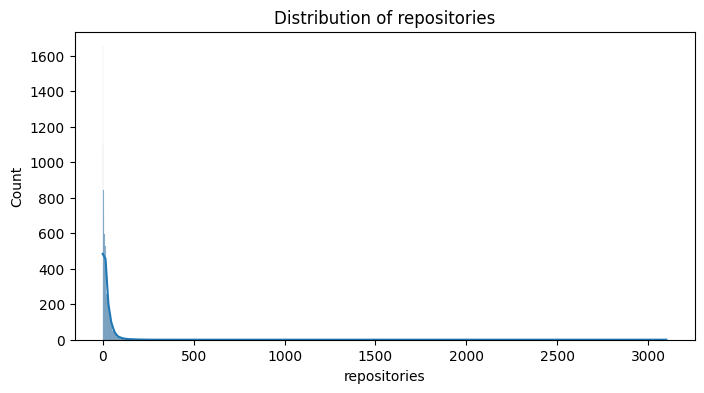

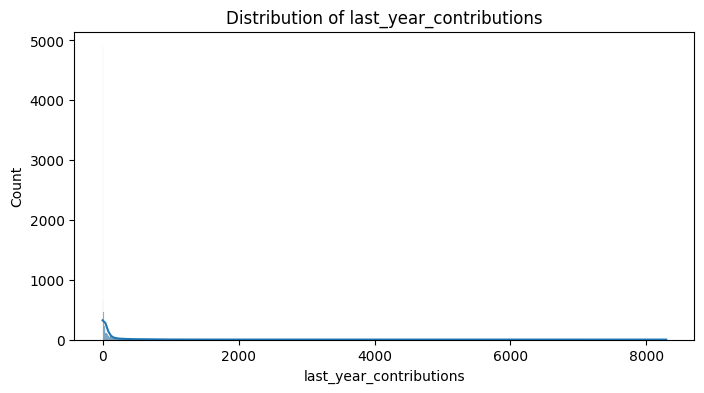

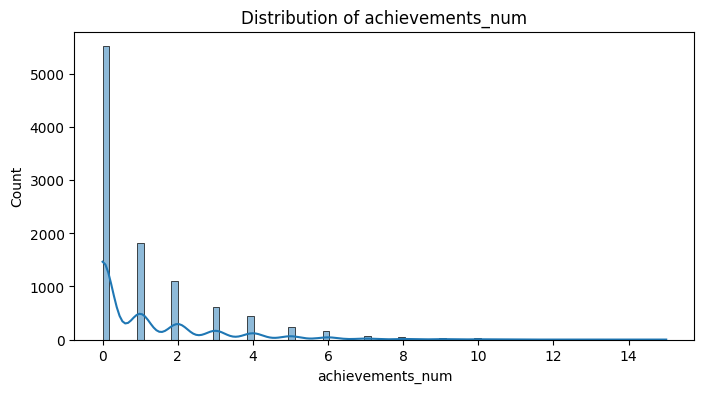

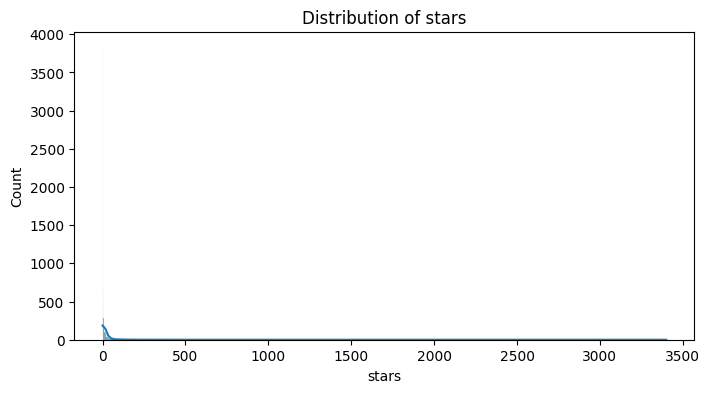

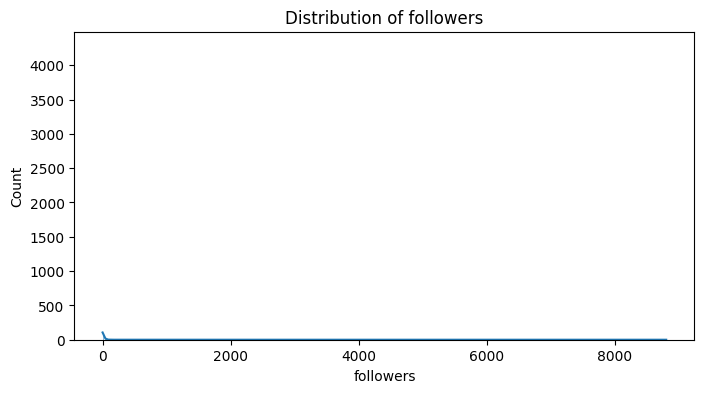

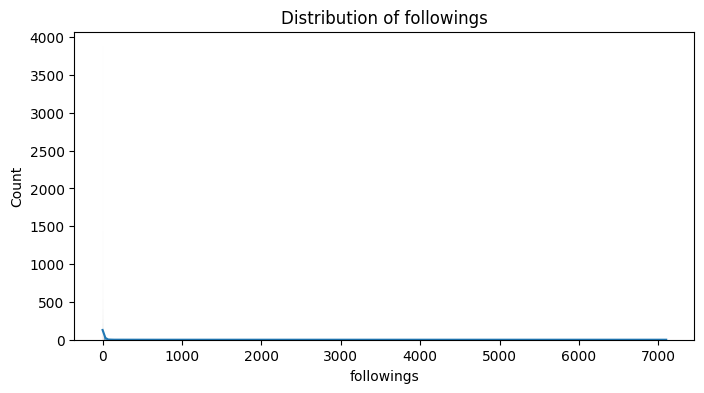

In [ ]:
# Univariate Analysis
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

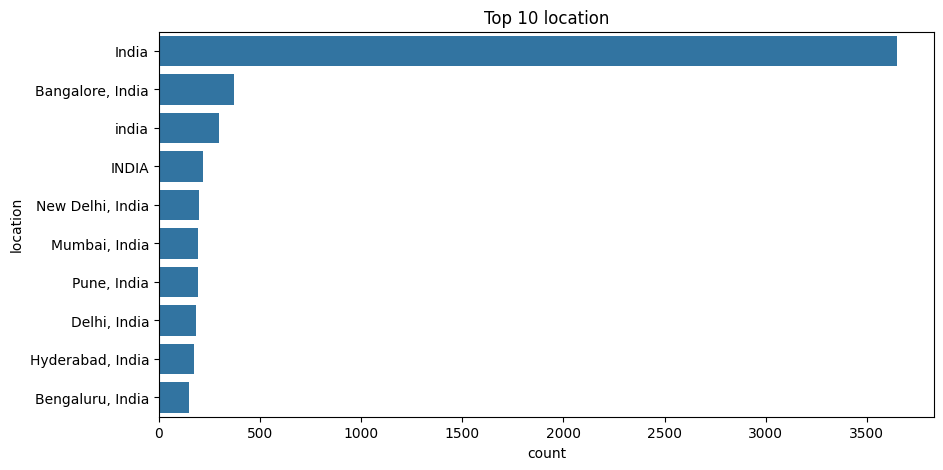

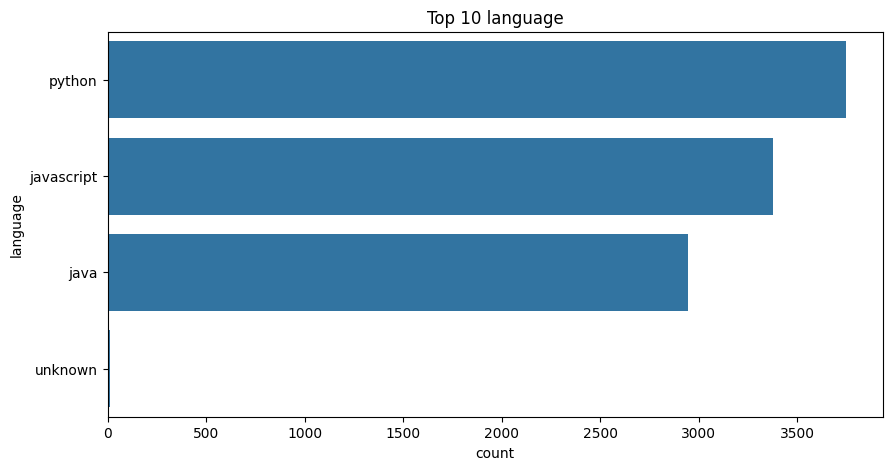

In [ ]:
# Categorical Columns
categorical_cols = ['location', 'language']
for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f'Top 10 {col}')
    plt.show()

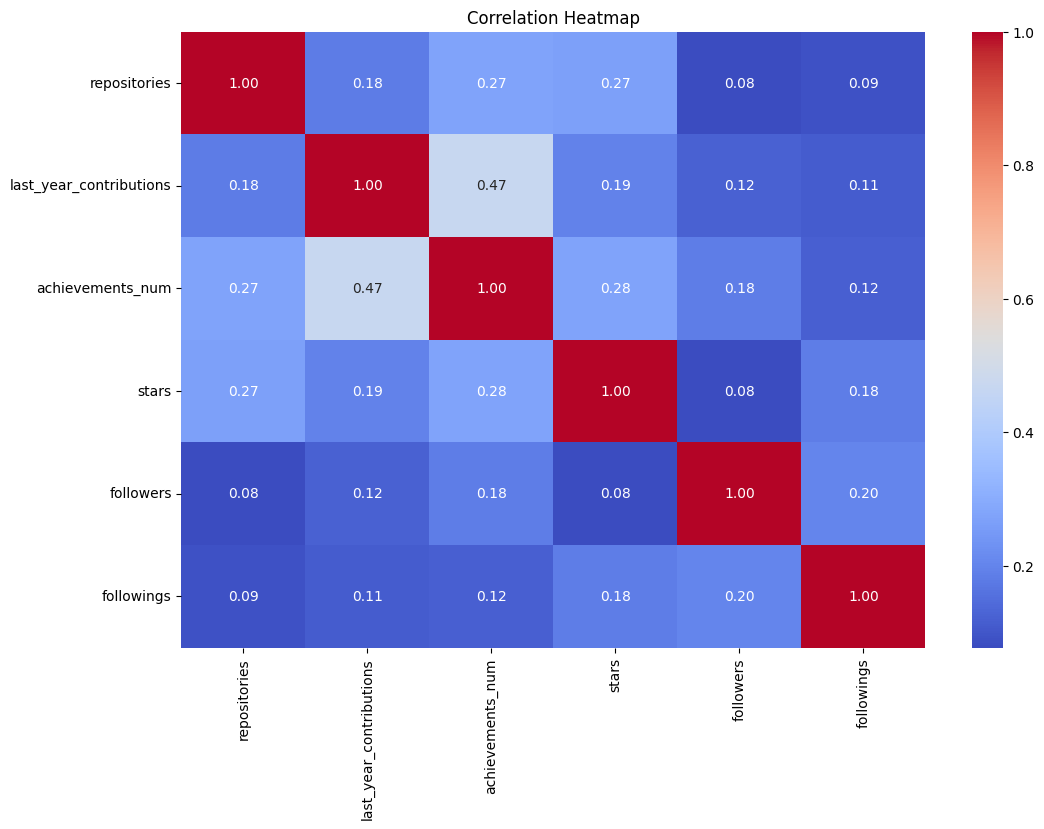

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Outlier Treatment (Capping at 1st and 99th percentiles)
for col in numeric_cols:
    q1 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    df[col] = np.clip(df[col], q1, q99)

# **Feature Engineering**

In [ ]:
# Follower-Following Ratio
df['follower_following_ratio'] = df['followers'] / (df['followings'] + 1)


In [ ]:
# Activity Score
df['activity_score'] = df['repositories'] + df['last_year_contributions'] + df['achievements_num']


In [ ]:
# 9. Final Data Check
print("\nFinal Data Preview:")
print(df.head())
print(df.shape)



Final Data Preview:
          username             name joining_year  repositories  \
0    SumithSPrince         Sumith S         2021             1   
1      infysumanta  Sumanta Kabiraj         2018           142   
2  codingwithkrish      Krish Gupta         2021            37   
3   anirbanbose401     ANIRBAN BOSE         2023             3   
4    neilrehani101      Neil Rehani         2021            29   

   last_year_contributions  achievements_num  stars  followers  followings  \
0                      2.0                 0    0.0          0           1   
1                    623.0                 5   87.0          9          38   
2                    204.0                 6    9.0          6           8   
3                      2.0                 0    0.0          0           3   
4                      6.0                 0    0.0          0           3   

   has_readme          location language          sorting type  \
0       False  Bangalore, India     java  Most 

In [ ]:
df["language"]

In [ ]:
# Save Preprocessed Data
df.to_csv('preprocessed_data.csv', index=False)
